In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the cleaned data.
df = pd.read_csv("/content/drive/MyDrive/SAP_CASE_GRIND/cleaned_data.csv", encoding = 'latin-1')
print("Initial cleaned data shape:", df.shape)

Initial cleaned data shape: (8129, 32)


In [4]:
year_columns = [str(year) for year in range(2000, 2024)]
print("Year columns identified:", year_columns)

df['Average'] = df[year_columns].mean(axis=1, skipna=True)

Year columns identified: ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [9]:
# Pivot so that each row represents a country and each column represents an indicator's average value.
pivot_df = df.pivot_table(
    index=["Country Name", "Country Code"],
    columns="Indicator Name",
    values="Average"
)
pivot_df.reset_index(inplace=True)
print("Pivoted data shape:", pivot_df.shape)

indicator_cols = pivot_df.columns.drop(["Country Name", "Country Code"])


Pivoted data shape: (186, 77)


In [11]:
missing_counts = pivot_df[indicator_cols].isnull().sum()
print("Missing values per indicator:\n", missing_counts.sort_values(ascending=False))


Missing values per indicator:
 Indicator Name
Children in employment, total (% of children ages 7-14)                                    185
Children in employment, study and work (% of children in employment, ages 7-14)            185
Children in employment, work only (% of children in employment, ages 7-14)                 185
Wanted fertility rate (births per woman)                                                   185
Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)    184
                                                                                          ... 
Urban population (% of total population)                                                     0
Adolescent fertility rate (births per 1,000 women ages 15-19)                                0
Age dependency ratio, old (% of working-age population)                                      0
Age dependency ratio, young (% of working-age population)                                    0
Age 

In [12]:
pivot_df[indicator_cols] = pivot_df[indicator_cols].apply(lambda col: col.fillna(col.mean()), axis=0)


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df[indicator_cols])

In [14]:
pca_full = PCA(n_components=len(indicator_cols))
X_pca_full = pca_full.fit_transform(X_scaled)

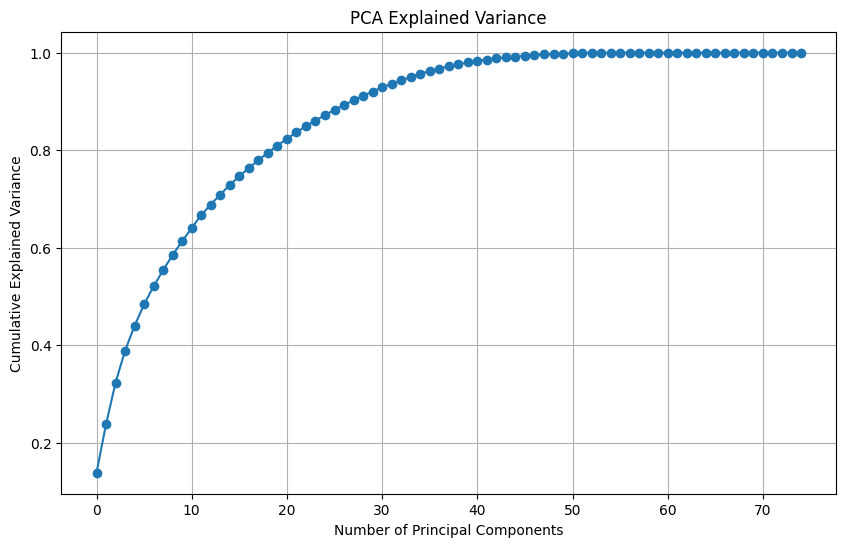

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=1)
composite_index = pca.fit_transform(X_scaled).flatten()

# Add the composite index back to the pivot DataFrame
pivot_df["Composite Index"] = composite_index



Top 10 countries based on Composite Index:
Indicator Name              Country Name  Composite Index  Rank
89                                 Kenya         6.697794   1.0
115                              Myanmar         6.595136   2.0
124                              Nigeria         6.165991   3.0
116                              Namibia         6.107106   4.0
34              Central African Republic         6.085879   5.0
145                Sao Tome and Principe         5.962799   6.0
104                                 Mali         5.546862   7.0
165                           Tajikistan         5.261715   8.0
175                               Uganda         5.232555   9.0
122                            Nicaragua         5.092435  10.0

Indicator loadings for the first principal component:
                                                             PC1  \
Indicator Name                                                     
Age dependency ratio, young (% of working-age p...  2.377061e

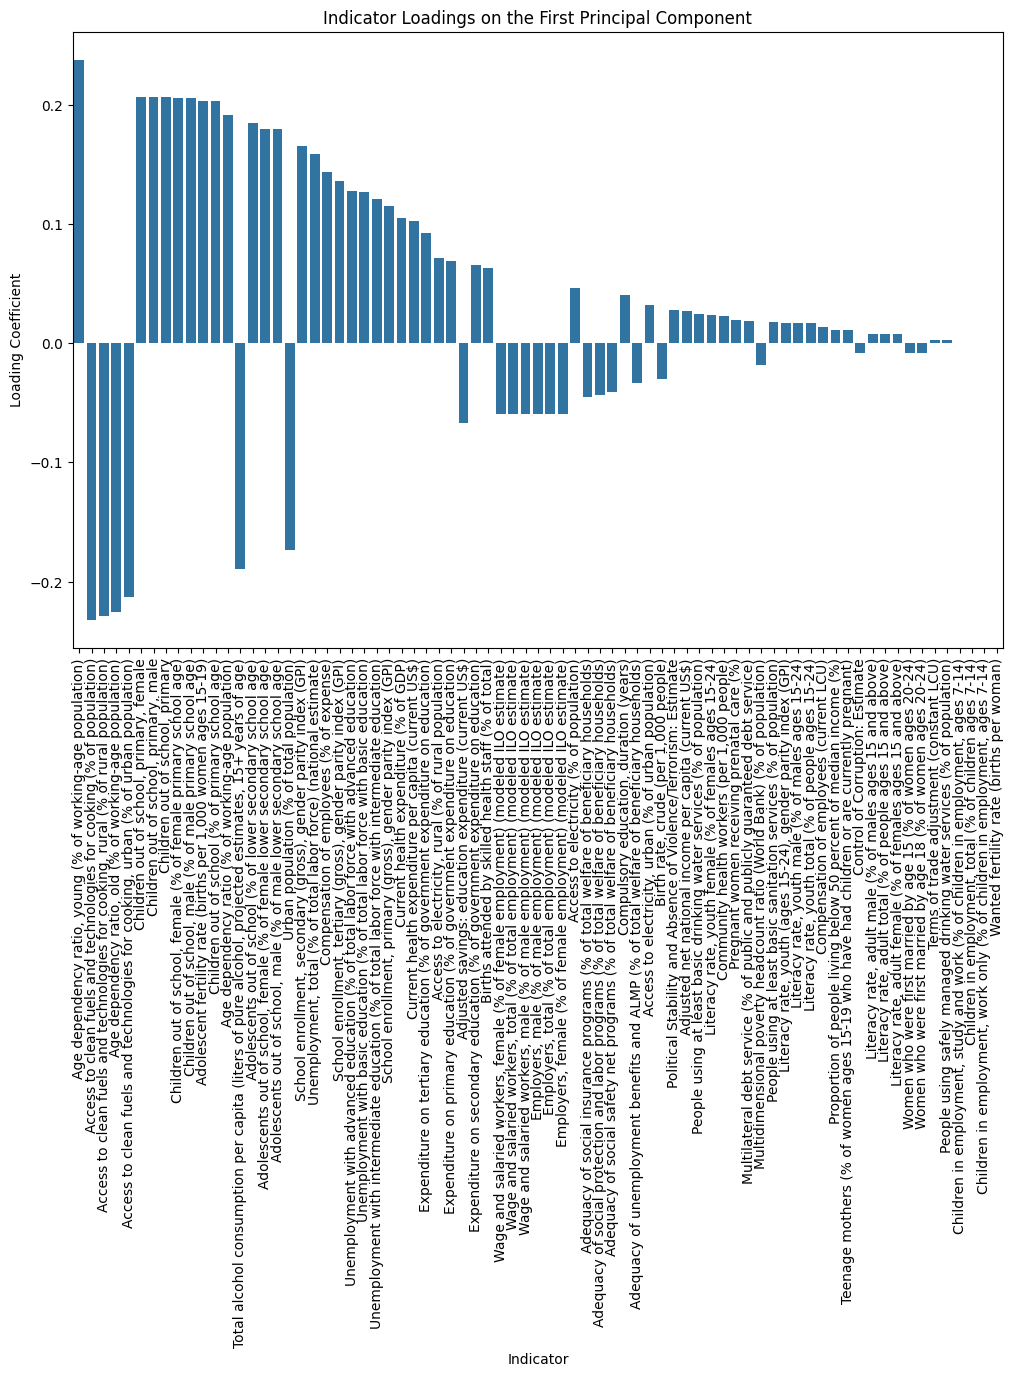

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


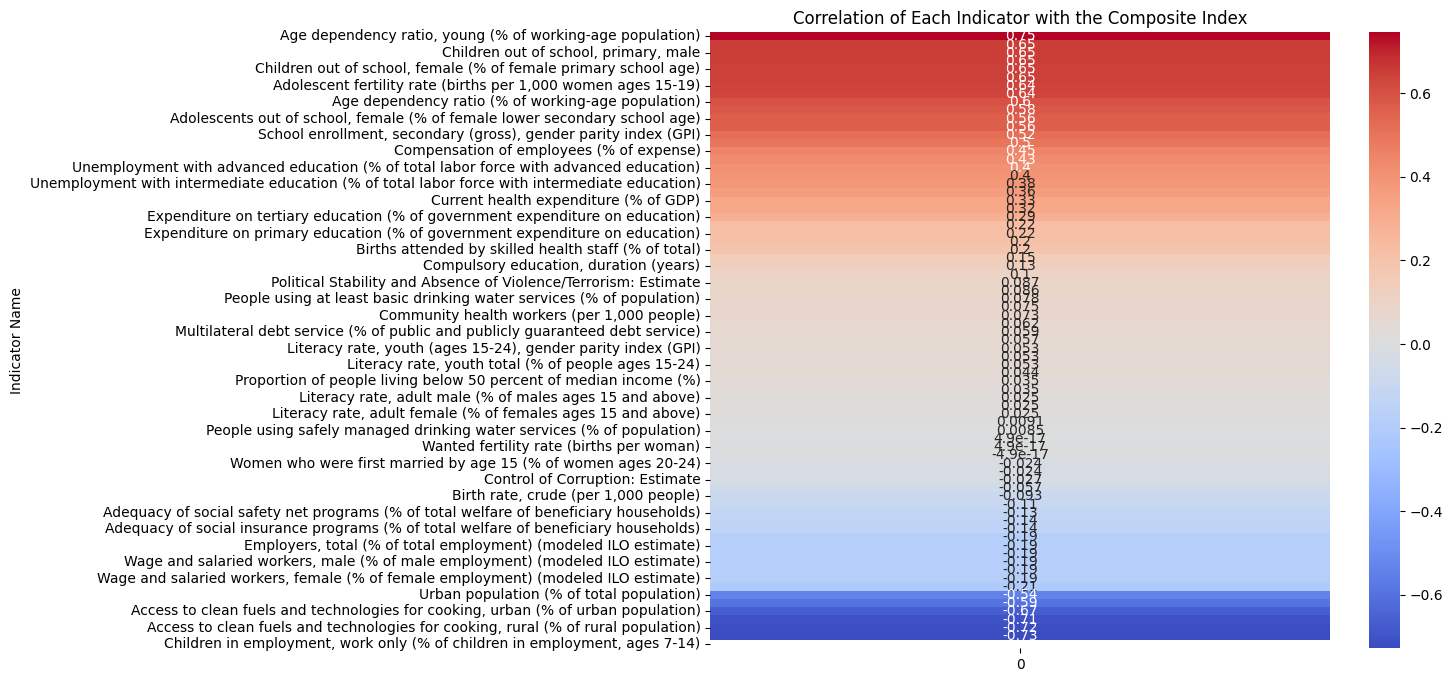

Country composite index rankings saved to '/content/drive/MyDrive/SAP_CASE_GRIND/country_composite_index_ranking.csv'


In [18]:
pivot_df["Rank"] = pivot_df["Composite Index"].rank(ascending=False)
pivot_sorted = pivot_df.sort_values("Rank")

print("\nTop 10 countries based on Composite Index:")
print(pivot_sorted[["Country Name", "Composite Index", "Rank"]].head(10))

# Examine the PCA loadings to understand the contribution of each indicator.
loadings = pd.DataFrame(pca.components_.T, index=indicator_cols, columns=["PC1"])
loadings["Absolute Loading"] = loadings["PC1"].abs()
loadings = loadings.sort_values("Absolute Loading", ascending=False)

print("\nIndicator loadings for the first principal component:")
print(loadings)

plt.figure(figsize=(12, 8))
sns.barplot(x=loadings.index, y="PC1", data=loadings)
plt.xticks(rotation=90)
plt.title("Indicator Loadings on the First Principal Component")
plt.ylabel("Loading Coefficient")
plt.xlabel("Indicator")
plt.show()

#calculate correlation
corr_with_index = pivot_df[indicator_cols].corrwith(pivot_df["Composite Index"]).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_index.to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation of Each Indicator with the Composite Index")
plt.show()


output_file = "/content/drive/MyDrive/SAP_CASE_GRIND/country_composite_index_ranking.csv"
pivot_sorted.to_csv(output_file, index=False)
print(f"Country composite index rankings saved to '{output_file}'")

In [19]:
pd.read_csv("/content/drive/MyDrive/SAP_CASE_GRIND/country_composite_index_ranking.csv")

,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),...,"Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population),"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Composite Index,Rank
0,Kenya,KEN,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,7.489755e+09,24.371083,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,6.697794,1.0
1,Myanmar,MMR,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,7.489755e+09,29.294000,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,6.595136,2.0
2,Nigeria,NGA,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,1.699290e+10,44.706333,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,6.165991,3.0
3,Namibia,NAM,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,3.111881e+08,-3.563425e+09,1.609476e+10,1.569864e+10,...,2.694410e+10,43.324917,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,6.107106,4.0
4,Central African Republic,CAF,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.217539e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,7.489755e+09,39.768750,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,6.085879,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Slovenia,SVN,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,6.374625e+00,53.085667,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,-6.189603,182.0
182,Poland,POL,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.520881e+10,2.520881e+10,...,9.768458e+00,60.792917,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,-6.230644,183.0
183,Denmark,DNK,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,5.509000e+00,86.892542,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,-6.267898,184.0
184,Finland,FIN,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,-3.563425e+09,1.609476e+10,1.569864e+10,...,8.480917e+00,84.197750,-3.563425e+09,-3.563425e+09,-3.563425e+09,2.286331e+10,2.489215e+10,2.489215e+10,-6.450975,185.0
